# Feature Extraction and Clustering International NBA Players
Feature engineering through Principal Component Analysis and Linear Discriminant Analysis, and then K-Means clustering

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv(r'Documents\International Player Career Average Stats.csv')

In [3]:
df.head()

,Player,Pos,Player_ID,FG%,Avg_FGA_Dist,%FGA_2P,%FGA_0-3,%FGA_3-10,%FGA_10-16,%FGA_16-3P,%FGA_3P,2P_FG%,0-3_FG%,3-10_FG%,10-16_FG%,16-3P_FG%,3P_FG%,%AST_2P,%AST_3P,%FGA_Dunk,Dunks,%_Corner3PA,3P%_Corner3,Heave_Att,Heave_MD,FG_100,FGA_100,3P_100,3PA_100,2P_100,2PA_100,FT_100,FTA_100,FT%,ORB_100,DRB_100,TRB_100,AST_100,STL_100,BLK_100,TOV_100,PF_100,PTS_100,ORtg,DRtg,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Abdel Nader,SF,n/naderab01,0.428,13.3,0.550,0.299,0.192,0.035,0.024,0.450,0.486,0.614,0.349,0.296,0.263,0.357,0.572,0.976,0.035,24.0,0.357,0.392,2.0,0.0,6.2,14.6,2.3,6.6,3.9,8.0,2.5,3.5,0.718,1.0,6.1,7.0,2.1,1.4,1.0,2.5,4.6,17.4,100.0,109.0,9.3,0.538,0.450,0.242,2.2,13.5,7.9,6.0,1.4,1.8,13.4,16.7,-0.5,3.2,2.8,0.052,-3.0,0.4,-2.6,-0.4
1,Adonal Foyle,C,f/foylead01,0.477,4.9,0.999,0.424,0.453,0.094,0.028,0.001,0.477,0.583,0.414,0.349,0.321,0.000,0.605,0.000,0.077,192.0,0.000,0.000,0.0,0.0,5.2,10.9,0.0,0.0,5.2,10.8,1.4,2.8,0.499,5.1,8.5,13.6,1.3,1.0,4.7,2.3,6.2,11.7,99.0,104.0,12.3,0.486,0.001,0.256,10.5,18.4,14.3,4.0,1.0,6.4,16.2,12.2,3.2,15.4,18.7,0.069,-2.8,1.2,-1.7,1.1
2,Al Horford,C,h/horfoal01,0.515,11.3,0.839,0.276,0.223,0.126,0.214,0.161,0.544,0.729,0.449,0.443,0.465,0.360,0.696,0.970,0.079,788.0,0.192,0.354,2.0,0.0,9.0,17.6,1.0,2.8,8.0,14.7,2.5,3.4,0.759,3.2,9.7,12.9,5.2,1.3,1.9,2.4,3.5,21.6,115.0,105.0,18.5,0.568,0.161,0.191,7.3,21.4,14.4,16.6,1.3,3.0,11.2,19.0,55.5,44.8,100.3,0.157,1.7,1.2,2.9,37.9
3,Aleksej Pokusevski,PF,p/pokusal01,0.376,16.1,0.532,0.170,0.200,0.094,0.068,0.468,0.457,0.646,0.387,0.383,0.288,0.285,0.495,0.930,0.054,43.0,0.198,0.325,1.0,0.0,6.7,17.9,2.4,8.4,4.4,9.5,1.4,1.9,0.717,2.1,8.9,11.0,4.7,1.2,1.7,4.0,3.0,17.2,89.0,112.0,9.2,0.459,0.468,0.106,4.5,19.3,11.8,14.9,1.2,3.1,17.6,20.2,-4.0,2.4,-1.5,-0.032,-3.8,-0.4,-4.2,-1.3
4,Alex Len,C,l/lenal01,0.507,6.5,0.899,0.517,0.213,0.089,0.080,0.101,0.527,0.656,0.384,0.315,0.311,0.329,0.688,0.991,0.212,625.0,0.473,0.367,3.0,0.0,7.5,14.8,0.5,1.5,7.0,13.3,4.0,5.8,0.683,4.8,10.1,14.9,2.2,1.0,2.4,3.0,6.5,19.4,109.0,109.0,15.2,0.561,0.101,0.396,10.6,23.1,16.8,6.9,1.0,4.2,14.8,17.9,10.5,11.1,21.6,0.096,-1.8,-0.1,-1.9,0.2


### Preprocessing

In [4]:
X = df.drop(['Player','Pos','Player_ID','Heave_Att','Heave_MD'],axis =1)
y = df['Pos']

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### How many players are in the dataset?

In [6]:
print('There are {} international players in the clustering dataset'.format(df.shape[0]))

There are 292 international players in the clustering dataset


#### How many dimensions are included in the dataset?

In [7]:
print('There are {} dimensions in the clustering dataset'.format(X_scaled.shape[1]))

There are 60 dimensions in the clustering dataset


## Dimensionality Reduction
Seeing that we have 60 dimensions in our dataset, we will need to find a way to reduce the dimensionality of our dataset so that we can obtain a more accurate, statistically significant output. With such high-dimensional data, our number of features is disproportionate to the number of records we have, and the data points are likely very far apart, which is problematic for creating an algorithm. We want to reduce the number of features in our dataset, while still capturing most of the variance that is in our dataset.

To accomplish this, we will look at two methods: **Principal Component Analysis** and **Linear Discriminant Analysis**.

### Principal Component Analysis (PCA)

In [8]:
pca=PCA()
pca.fit_transform(X_scaled)

array([[-3.66347091e+00, -1.57160119e+00,  1.44696162e+00, ...,
         1.49363588e-04, -2.07395476e-03,  2.45589856e-05],
       [ 4.59898434e+00, -5.08268107e+00,  1.00617434e-01, ...,
        -1.89691271e-03, -9.70129216e-04, -1.85247662e-05],
       [ 3.15949109e+00,  5.26767141e+00,  1.52901106e+00, ...,
        -6.65022117e-04,  1.44925547e-03, -4.69170107e-05],
       ...,
       [ 3.17337477e+00, -3.78167465e+00, -3.19073140e+00, ...,
         8.41573162e-04, -1.30312688e-03, -6.24015869e-05],
       [ 8.45635683e-02, -1.11539761e+00, -3.09741362e+00, ...,
         3.61231556e-04,  2.41267964e-03, -3.78231295e-06],
       [ 4.70912832e+00, -9.79000219e-01, -1.78196087e+00, ...,
        -3.42333401e-03, -9.72061097e-04,  9.47797480e-08]])

In [9]:
pca.explained_variance_ratio_

array([3.08884900e-01, 1.98248532e-01, 9.68518194e-02, 6.77378851e-02,
       4.61633122e-02, 3.80906438e-02, 3.13381318e-02, 3.05212288e-02,
       2.07518984e-02, 1.97070819e-02, 1.85876960e-02, 1.48670556e-02,
       1.35757044e-02, 1.16591803e-02, 1.00812047e-02, 9.27325721e-03,
       8.33559865e-03, 8.03870860e-03, 6.01604316e-03, 5.49391134e-03,
       5.46062413e-03, 4.80099589e-03, 4.05616817e-03, 3.74324541e-03,
       2.93661168e-03, 2.84016830e-03, 2.57932501e-03, 1.90822908e-03,
       1.42314538e-03, 1.24093629e-03, 1.19565242e-03, 7.98119022e-04,
       6.38716554e-04, 5.25062856e-04, 3.87498655e-04, 2.81296396e-04,
       2.02341717e-04, 1.77469871e-04, 1.27109267e-04, 9.11255764e-05,
       8.29429595e-05, 6.50694983e-05, 4.93963228e-05, 4.19801303e-05,
       3.09660121e-05, 2.27481264e-05, 2.10030015e-05, 1.47426875e-05,
       9.86014754e-06, 8.22359997e-06, 5.15434652e-06, 2.83868901e-06,
       2.26111664e-06, 1.90285961e-06, 1.32923467e-06, 1.12689825e-06,
      

#### Plotting the Variance Explained by Top 8 Principal Component

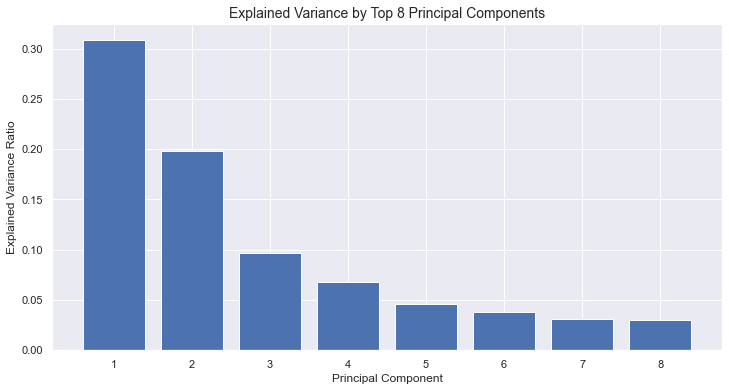

In [10]:
plt.figure(figsize=(12,6))
components = list(range(1,9))
var_exp_8 = pca.explained_variance_ratio_[0:8]
plt.bar(components, var_exp_8)
plt.title('Explained Variance by Top 8 Principal Components', fontsize=14)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

#### Plotting the Cumulative Variance Explained by Top 8 Principal Components

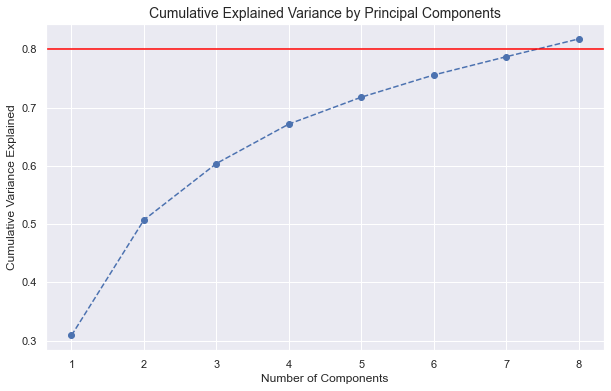

In [11]:
plt.figure(figsize=(10,6))
plt.plot(range(1,9), var_exp_8.cumsum(), marker = 'o', linestyle = '--')
plt.title('Cumulative Explained Variance by Principal Components', fontsize = 14)
plt.axhline(y=0.8, color = 'red', linestyle = 'solid')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()

In [12]:
print('There are cumulative variance explained by the top 8 components is {}'.format(var_exp_8.cumsum()[7]))

There are cumulative variance explained by the top 8 components is 0.8178364529859787


**Thoughts**

Using PCA, we needed 8 components to ultimately get to our threshhold of 80% variance explained. While reducing 62 features into 8 components is a significant dimensionality reduction, let's see if we can reduce the dimensionality with less components using LDA.

### Linear Discriminant Analysis (LDA)

LDA can have n-1 components, with n being the number of classes of the y variable (Pos). There are 5 positions in basketball, meaning 5 classes, so we can run an LDA and look at the explained variance across 1-4 components.

In [13]:
LDA = LinearDiscriminantAnalysis()

In [14]:
LDA.fit(X_scaled,y).transform(X_scaled)

array([[-1.29122146,  1.8652948 , -0.07814552, -0.0242398 ],
       [ 3.75115815, -1.92479294,  2.64120257,  1.26346763],
       [ 1.54610626, -0.03231331, -1.06585554,  0.44149918],
       ...,
       [ 2.54212489, -0.53993754,  1.32405747,  0.16825958],
       [ 1.38778108,  1.76735699,  0.11276801,  0.01838159],
       [ 2.20245667, -2.92559365,  1.339013  ,  1.87462799]])

In [15]:
LDA.explained_variance_ratio_

array([0.72803525, 0.20363425, 0.04031467, 0.02801583])

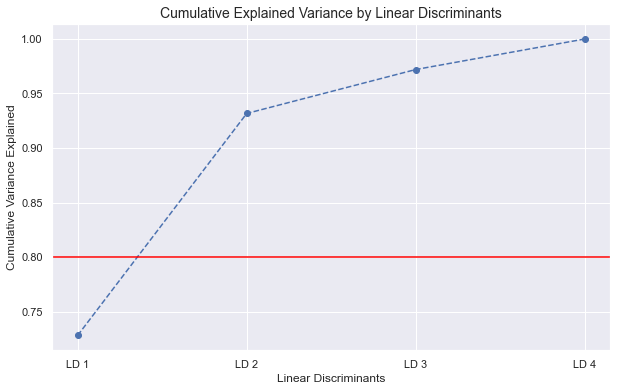

In [16]:
lda_variance = LDA.explained_variance_ratio_

plt.figure(figsize=(10,6))
plt.plot(['LD 1','LD 2','LD 3','LD 4'], lda_variance.cumsum(), marker = 'o', linestyle = '--')
plt.title('Cumulative Explained Variance by Linear Discriminants', fontsize = 14)
plt.axhline(y=0.8, color = 'red', linestyle = 'solid')
plt.xlabel('Linear Discriminants')
plt.ylabel('Cumulative Variance Explained')
plt.show()

**Thoughts**

The first two discriminants explain over 90% of the variance, so we will use n_components = 2 and re-fit the LDA on the dataframe and continue on to our clustering analysis using the LDA-fitted dataframe.

In [17]:
LDA = LinearDiscriminantAnalysis(n_components=2)
LDA_array = LDA.fit(X_scaled,y).transform(X_scaled)

In [18]:
LDA_array

array([[-1.29122146e+00,  1.86529480e+00],
       [ 3.75115815e+00, -1.92479294e+00],
       [ 1.54610626e+00, -3.23133068e-02],
       [-3.81364079e-01,  9.88510658e-01],
       [ 2.30432943e+00, -2.79299195e-02],
       [-4.21883645e+00,  3.66982249e-01],
       [ 2.78077749e+00, -1.63664690e+00],
       [ 2.47321010e-01, -1.74018375e-01],
       [ 2.88629859e+00, -1.07155562e+00],
       [ 1.44876298e+00,  4.28684099e-01],
       [ 6.32060914e-01,  2.04234912e+00],
       [ 3.19878152e+00, -5.90867641e-01],
       [ 7.93368856e-01,  1.51463383e+00],
       [-2.30113295e+00,  1.07099792e+00],
       [ 4.09424439e+00, -1.69830227e+00],
       [ 6.69745327e-02,  1.05153543e+00],
       [ 2.52382437e+00, -1.40843447e+00],
       [ 6.96792155e-01,  2.15300857e+00],
       [ 2.83931869e+00, -1.36973131e+00],
       [ 3.08678199e+00, -1.47436673e-01],
       [-3.43324351e+00,  1.52888739e+00],
       [-2.86707705e+00, -4.14412598e+00],
       [-4.73889473e+00, -1.98512205e+00],
       [ 3.

## Clustering

### Determing K for K-means clustering

To begin the clustering exercise, we must first determine the optimal k (number of clusters) to use. To determine k, we will consult two methods: 
- the Elbow Method
- the Silhouette Method

#### Elbow Method

In [19]:
wcss = []
for i in range(5,12):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state = 42)
    kmeans.fit(LDA_array)
    wcss.append(kmeans.inertia_)

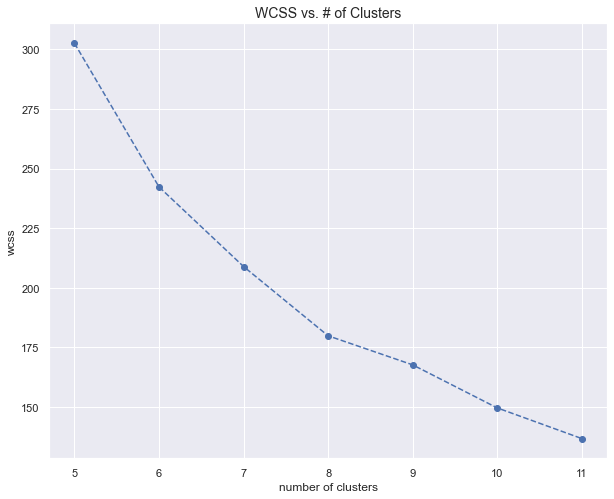

In [20]:
plt.figure(figsize=(10,8))
plt.plot(range(5,12), wcss, linestyle = '--', marker = 'o')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.title('WCSS vs. # of Clusters', fontsize=14)
plt.show()

#### Silhouette Method

In [21]:
sil = []
for k in range(5, 12):
  kmeans = KMeans(n_clusters = k).fit(LDA_array)
  labels = kmeans.labels_
  sil.append(silhouette_score(LDA_array, labels, metric = 'euclidean'))

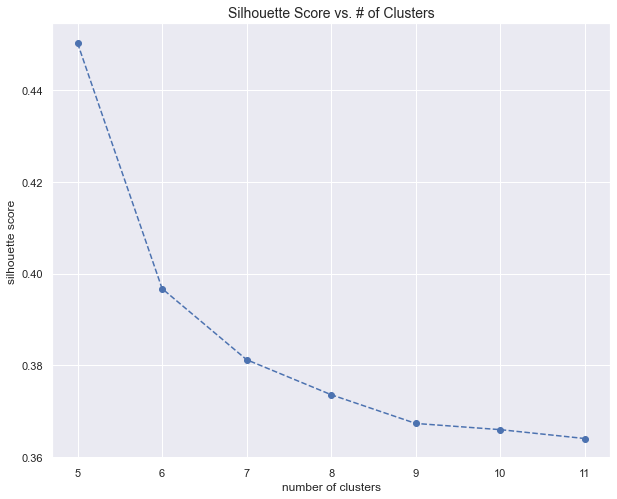

In [22]:
plt.figure(figsize=(10,8))
plt.plot(range(5,12), sil, linestyle = '--', marker = 'o')
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')
plt.title('Silhouette Score vs. # of Clusters', fontsize=14)
plt.show()

**Thoughts**

I will opt for 8 clusters, which is more clearly supported by the Elbow method. I would like to cluster the players into more groups than there are positions (5) and make sure that I can identify some more subgroups that exist that I might not see if I limit the number of clusters.

### Creating the K-Means Clustering Algorithm

In [23]:
kmeans_lda = KMeans(n_clusters=8, init='k-means++', random_state=42)

In [24]:
kmeans_lda.fit(LDA_array)

KMeans(random_state=42)

In [25]:
LDA_df = pd.DataFrame({'LDA_1':LDA_array[:,0],'LDA_2':LDA_array[:,1]})
df['LDA 1'] = LDA_df['LDA_1']
df['LDA 2'] = LDA_df['LDA_2']

In [26]:
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns.values)

In [27]:
# Adding the cluster labels to the dataframes

X['Cluster'] = kmeans_lda.labels_
X_scaled_df['Cluster'] = kmeans_lda.labels_
df['Cluster'] = kmeans_lda.labels_

In [28]:
kmeans_lda_df = X.join(LDA_df)

In [29]:
# Aggregating the data by cluster to get the mean values for each column

kmeans_lda_mean = kmeans_lda_df.groupby(['Cluster']).mean()
kmeans_lda_mean

,FG%,Avg_FGA_Dist,%FGA_2P,%FGA_0-3,%FGA_3-10,%FGA_10-16,%FGA_16-3P,%FGA_3P,2P_FG%,0-3_FG%,3-10_FG%,10-16_FG%,16-3P_FG%,3P_FG%,%AST_2P,%AST_3P,%FGA_Dunk,Dunks,%_Corner3PA,3P%_Corner3,FG_100,FGA_100,3P_100,3PA_100,2P_100,2PA_100,FT_100,FTA_100,FT%,ORB_100,DRB_100,TRB_100,AST_100,STL_100,BLK_100,TOV_100,PF_100,PTS_100,ORtg,DRtg,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,LDA_1,LDA_2
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.479778,10.535556,0.798378,0.387133,0.188333,0.082267,0.140489,0.201622,0.518844,0.643644,0.378733,0.377467,0.368244,0.263133,0.676089,0.816667,0.092778,166.466667,0.226867,0.275289,7.495556,15.742222,1.113333,3.297778,6.380000,12.444444,3.504444,4.835556,0.724311,3.640000,8.106667,11.753333,2.795556,1.366667,1.386667,2.715556,5.875556,19.611111,108.222222,107.666667,14.004444,0.549200,0.201622,0.316778,8.048889,18.162222,13.082222,8.622222,1.366667,2.284444,13.371111,18.075556,10.897778,10.580000,21.495556,0.097556,-1.273333,-0.111111,-1.393333,4.648889,1.071493,0.320019
1,0.420065,15.223913,0.570370,0.257457,0.107761,0.067652,0.137435,0.429630,0.476674,0.620913,0.326152,0.321457,0.377543,0.339391,0.602957,0.928065,0.045261,71.434783,0.331087,0.370848,6.641304,15.784783,2.371739,6.752174,4.263043,9.028261,2.828261,3.710870,0.762435,1.565217,5.254348,6.815217,3.041304,1.550000,0.643478,2.417391,4.323913,18.484783,103.891304,110.239130,10.991304,0.529457,0.429630,0.235609,3.441304,11.697826,7.558696,9.182609,1.545652,1.043478,12.319565,17.393478,6.139130,5.695652,11.843478,0.059109,-1.591304,-0.352174,-1.945652,2.319565,-1.683467,1.879232
2,0.424611,14.766667,0.616222,0.237333,0.144389,0.105722,0.128778,0.383778,0.475611,0.603611,0.382667,0.375111,0.386667,0.341444,0.368833,0.789889,0.013556,22.277778,0.220111,0.385944,6.805556,15.905556,1.983333,5.833333,4.816667,10.061111,3.088889,3.972222,0.788333,1.083333,4.933333,6.022222,7.283333,1.927778,0.455556,3.388889,4.366667,18.661111,105.111111,109.611111,12.466667,0.527889,0.379500,0.238333,2.427778,10.938889,6.705556,22.038889,1.927778,0.788889,16.416667,18.605556,6.100000,6.205556,12.316667,0.069667,-1.344444,0.211111,-1.116667,2.783333,-3.925431,-1.248263
3,0.519205,6.417949,0.969282,0.465949,0.272897,0.137462,0.093000,0.030718,0.527974,0.656564,0.405897,0.372385,0.341436,0.113487,0.687359,0.555923,0.121256,297.333333,0.094949,0.132282,8.064103,15.638462,0.148718,0.548718,7.917949,15.079487,3.789744,5.458974,0.673872,5.015385,10.128205,15.158974,2.297436,1.110256,2.630769,3.010256,6.948718,20.079487,109.333333,104.282051,16.097436,0.555923,0.030590,0.353974,11.110256,22.456410,16.787179,7.258974,1.112821,3.984615,14.561538,18.379487,14.835897,16.510256,31.364103,0.124077,-1.346154,0.405128,-0.956410,6.723077,3.122432,-1.589966
4,0.432795,14.184091,0.620682,0.268455,0.140886,0.074955,0.136318,0.379318,0.493227,0.651295,0.364705,0.345341,0.337841,0.325455,0.653091,0.932364,0.060318,129.931818,0.284955,0.333591,7.234091,16.615909,2.084091,6.195455,5.147727,10.425000,3.170455,4.256818,0.740182,2.347727,7.488636,9.834091,2.993182,1.359091,1.070455,2.590909,4.781818,19.709091,104.477273,108.840909,12.506818,0.529841,0.378045,0.253886,5.179545,16.777273,10.954545,9.209091,1.359091,1.806818,12.336364,18.515909,10.431818,8.384091,18.806818,0.073432,-1.284091,-0.268182,-1.554545,5.870455,0.036770,1.430979
5,0.435222,13.988889,0.698278,0.248444,0.152556,0.117333,0.180111,0.301778,0.470611,0.573000,0.396556,0.408167,0.394333,0.328167,0.276778,0.734111,0.009722,30.000000,0.172500,0.380333,7.472222,17.077778,1.733333,5.033333,5.733333,12.072222,3.138889,3.977778,0.801833,1.011111,4.472222,5.488889,10.088889,1.661111,0.222222,4.155556,4.205556,19.822222,104.944444,109.833333,13.938889,0.525389,0.301778,0.230000,2.266667,9.927778,6.111111,31.233333,1.661111,0.377778,18.227778,20.161111,19.205556,10.272222,29.483333,0.075667,-0.200000,-0.750000,-0.972222,8.200000,-5.039738,-3.651965
6,0.424696,15.1

In [30]:
# Creating a heatmap dataframe to help scan for important features to help define each cluster

kmeans_lda_mean_color = kmeans_lda_mean.style.background_gradient(cmap='GnBu')
kmeans_lda_mean_color

,FG%,Avg_FGA_Dist,%FGA_2P,%FGA_0-3,%FGA_3-10,%FGA_10-16,%FGA_16-3P,%FGA_3P,2P_FG%,0-3_FG%,3-10_FG%,10-16_FG%,16-3P_FG%,3P_FG%,%AST_2P,%AST_3P,%FGA_Dunk,Dunks,%_Corner3PA,3P%_Corner3,FG_100,FGA_100,3P_100,3PA_100,2P_100,2PA_100,FT_100,FTA_100,FT%,ORB_100,DRB_100,TRB_100,AST_100,STL_100,BLK_100,TOV_100,PF_100,PTS_100,ORtg,DRtg,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,LDA_1,LDA_2
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.479778,10.535556,0.798378,0.387133,0.188333,0.082267,0.140489,0.201622,0.518844,0.643644,0.378733,0.377467,0.368244,0.263133,0.676089,0.816667,0.092778,166.466667,0.226867,0.275289,7.495556,15.742222,1.113333,3.297778,6.380000,12.444444,3.504444,4.835556,0.724311,3.640000,8.106667,11.753333,2.795556,1.366667,1.386667,2.715556,5.875556,19.611111,108.222222,107.666667,14.004444,0.549200,0.201622,0.316778,8.048889,18.162222,13.082222,8.622222,1.366667,2.284444,13.371111,18.075556,10.897778,10.580000,21.495556,0.097556,-1.273333,-0.111111,-1.393333,4.648889,1.071493,0.320019
1,0.420065,15.223913,0.570370,0.257457,0.107761,0.067652,0.137435,0.429630,0.476674,0.620913,0.326152,0.321457,0.377543,0.339391,0.602957,0.928065,0.045261,71.434783,0.331087,0.370848,6.641304,15.784783,2.371739,6.752174,4.263043,9.028261,2.828261,3.710870,0.762435,1.565217,5.254348,6.815217,3.041304,1.550000,0.643478,2.417391,4.323913,18.484783,103.891304,110.239130,10.991304,0.529457,0.429630,0.235609,3.441304,11.697826,7.558696,9.182609,1.545652,1.043478,12.319565,17.393478,6.139130,5.695652,11.843478,0.059109,-1.591304,-0.352174,-1.945652,2.319565,-1.683467,1.879232
2,0.424611,14.766667,0.616222,0.237333,0.144389,0.105722,0.128778,0.383778,0.475611,0.603611,0.382667,0.375111,0.386667,0.341444,0.368833,0.789889,0.013556,22.277778,0.220111,0.385944,6.805556,15.905556,1.983333,5.833333,4.816667,10.061111,3.088889,3.972222,0.788333,1.083333,4.933333,6.022222,7.283333,1.927778,0.455556,3.388889,4.366667,18.661111,105.111111,109.611111,12.466667,0.527889,0.379500,0.238333,2.427778,10.938889,6.705556,22.038889,1.927778,0.788889,16.416667,18.605556,6.100000,6.205556,12.316667,0.069667,-1.344444,0.211111,-1.116667,2.783333,-3.925431,-1.248263
3,0.519205,6.417949,0.969282,0.465949,0.272897,0.137462,0.093000,0.030718,0.527974,0.656564,0.405897,0.372385,0.341436,0.113487,0.687359,0.555923,0.121256,297.333333,0.094949,0.132282,8.064103,15.638462,0.148718,0.548718,7.917949,15.079487,3.789744,5.458974,0.673872,5.015385,10.128205,15.158974,2.297436,1.110256,2.630769,3.010256,6.948718,20.079487,109.333333,104.282051,16.097436,0.555923,0.030590,0.353974,11.110256,22.456410,16.787179,7.258974,1.112821,3.984615,14.561538,18.379487,14.835897,16.510256,31.364103,0.124077,-1.346154,0.405128,-0.956410,6.723077,3.122432,-1.589966
4,0.432795,14.184091,0.620682,0.268455,0.140886,0.074955,0.136318,0.379318,0.493227,0.651295,0.364705,0.345341,0.337841,0.325455,0.653091,0.932364,0.060318,129.931818,0.284955,0.333591,7.234091,16.615909,2.084091,6.195455,5.147727,10.425000,3.170455,4.256818,0.740182,2.347727,7.488636,9.834091,2.993182,1.359091,1.070455,2.590909,4.781818,19.709091,104.477273,108.840909,12.506818,0.529841,0.378045,0.253886,5.179545,16.777273,10.954545,9.209091,1.359091,1.806818,12.336364,18.515909,10.431818,8.384091,18.806818,0.073432,-1.284091,-0.268182,-1.554545,5.870455,0.036770,1.430979
5,0.435222,13.988889,0.698278,0.248444,0.152556,0.117333,0.180111,0.301778,0.470611,0.573000,0.396556,0.408167,0.394333,0.328167,0.276778,0.734111,0.009722,30.000000,0.172500,0.380333,7.472222,17.077778,1.733333,5.033333,5.733333,12.072222,3.138889,3.977778,0.801833,1.011111,4.472222,5.488889,10.088889,1.661111,0.222222,4.155556,4.205556,19.822222,104.944444,109.833333,13.938889,0.525389,0.301778,0.230000,2.266667,9.927778,6.111111,31.233333,1.661111,0.377778,18.227778,20.161111,19.205556,10.272222,29.483333,0.075667,-0.200000,-0.750000,-0.972222,8.200000,-5.039738,-3.651965
6,0.424696,15.1

In [32]:
# Reording df columns to place cluster and LDA columns near the beginning
# Ran df.columns and then rearranged

df = df[['Player', 'Pos', 'Cluster', 'LDA 1', 'LDA 2', 'Player_ID', 'FG%', 'Avg_FGA_Dist', '%FGA_2P',
       '%FGA_0-3', '%FGA_3-10', '%FGA_10-16', '%FGA_16-3P', '%FGA_3P',
       '2P_FG%', '0-3_FG%', '3-10_FG%', '10-16_FG%', '16-3P_FG%', '3P_FG%',
       '%AST_2P', '%AST_3P', '%FGA_Dunk', 'Dunks', '%_Corner3PA',
       '3P%_Corner3', 'Heave_Att', 'Heave_MD', 'FG_100', 'FGA_100', '3P_100',
       '3PA_100', '2P_100', '2PA_100', 'FT_100', 'FTA_100', 'FT%', 'ORB_100',
       'DRB_100', 'TRB_100', 'AST_100', 'STL_100', 'BLK_100', 'TOV_100',
       'PF_100', 'PTS_100', 'ORtg', 'DRtg', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']]

In [33]:
df['Label'] = df['Cluster'].map({0: 'Stretch Big Men',
                                 1: 'Shooting Wings',
                                 2: 'Combo Guards',
                                 3: 'Defensive Big Men',
                                 4: 'Versatile Forwards',
                                 5: 'Facilitators',
                                 6: '3 and D Wings',
                                 7: 'Traditional Centers'})

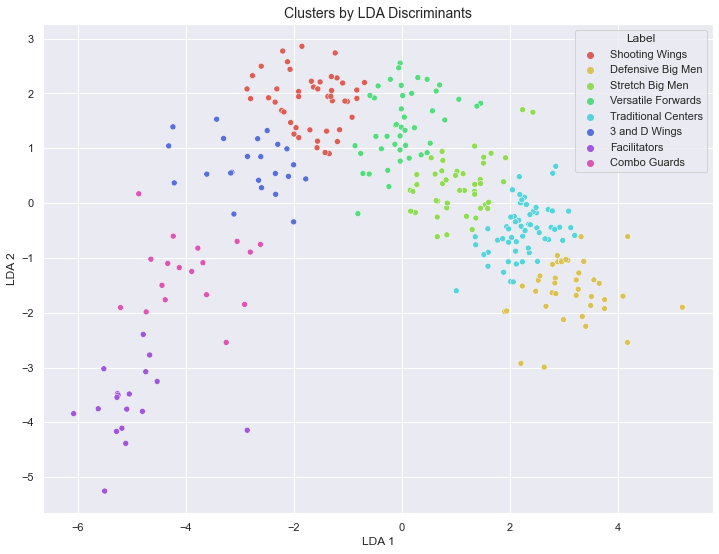

In [34]:
plt.figure(figsize=(12,9))
sns.scatterplot(df['LDA 1'], df['LDA 2'], hue = df['Label'], palette = sns.color_palette("hls",8))
plt.title('Clusters by LDA Discriminants', fontsize = 14)
plt.show()

**Thoughts**

Clusters with lower LDA 1 and LDA 2 values appear to have more within-class scatter, whereas classes from the center to the right have less within-class scatter. Despite the discrepancy in within-class scatter, all of the classes appear to be mostly well-separated from each other. The 3 clusters on the right all correspond to players that play center or power forward, which makes sense as to why they are so close together with a little less separation than other clusters.

### How many players are in each cluster?

In [35]:
cluster_counts = pd.DataFrame(df.groupby(['Label']).size().reset_index().rename(columns = {0:'count'}).sort_values(by='count'))

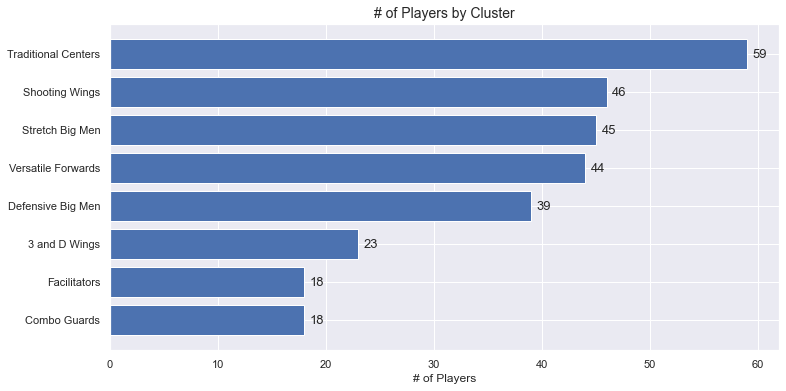

In [36]:
plt.figure(figsize=(12,6))
plt.barh(cluster_counts['Label'],cluster_counts['count'])
plt.title('# of Players by Cluster', fontsize=14)
plt.xlabel('# of Players')

for i, v in enumerate(cluster_counts['count']):
    plt.text(v + .5, i-.1, str(v), fontsize=13)

plt.show()

### Which clusters have had the greatest longevity in the NBA?
We will calculate the average # of seasons played for each cluster

In [37]:
intl_df = pd.read_csv(r'Documents\International Player Stats.csv')

In [38]:
num_seasons = intl_df.groupby(['Player'])['Year'].nunique().reset_index().rename(columns={'Year':'Seasons'})
seasons_df = pd.merge(df[['Player','Label']],num_seasons, how='left', on='Player')

In [40]:
cluster_seasons = seasons_df.groupby(['Label'])['Seasons'].mean().round(1).reset_index()

In [41]:
cluster_seasons = cluster_seasons.sort_values(by='Seasons')

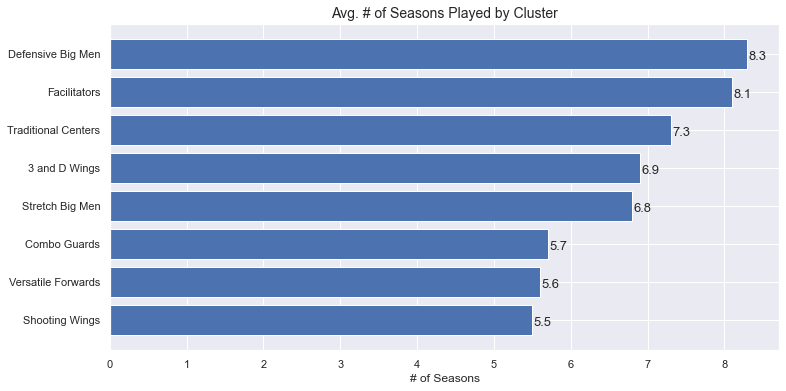

In [42]:
plt.figure(figsize=(12,6))
plt.barh(cluster_seasons['Label'],cluster_seasons['Seasons'])
plt.title('Avg. # of Seasons Played by Cluster', fontsize=14)
plt.xlabel('# of Seasons')

for i, v in enumerate(cluster_seasons['Seasons']):
    plt.text(v+.02, i-.15, str(v), fontsize=13)

plt.show()

### Comparing Usage vs Win Shares?
We will calculate the average usage for each cluster

**Usage**: An estimate of the percentage of team plays used by a player while they were on the floor.<br>
**Win Shares/48**: An estmate of the number of wins contributed by a player on a 48 minute basis.

In [44]:
usage_ws = df.groupby(['Label'])['USG%','WS/48'].mean().reset_index()

In [45]:
usage_ws

,Label,USG%,WS/48
0,3 and D Wings,20.808696,0.069261
1,Combo Guards,18.605556,0.069667
2,Defensive Big Men,18.379487,0.124077
3,Facilitators,20.161111,0.075667
4,Shooting Wings,17.393478,0.059109
5,Stretch Big Men,18.075556,0.097556
6,Traditional Centers,17.603390,0.100814
7,Versatile Forwards,18.515909,0.073432


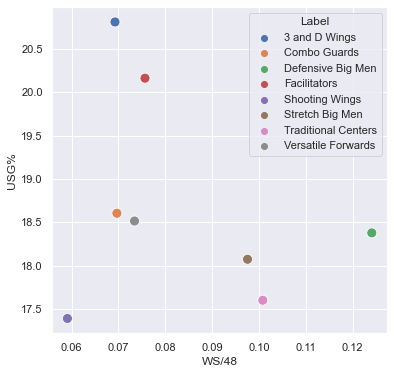

In [46]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=usage_ws, x="WS/48", y="USG%", hue="Label", s=100)
plt.show()

**Thoughts**

- Despite having the highest usage, the 3&D players have one of the lowest WS/48 averages. This might suggest that these players are less efficient, high-volume shooters from the perimeter.
- Defensive Big Men are able to contribute to winning while not commanding a high usage level. This might be because their role is more limited compared to guards and wings, who are more in charge of running the offense.
- The top 3 clusters by average WS/48 are big men/center clusters. A recurring theme throughout the International NBA player analysis has been the dominance of the big men position, and this is just further evidence to support their contributions to winning.

In [47]:
df.to_csv(r'\Documents\NBA Clustering.csv', index=False)